#Index 190494A
#Name Ranasinghe K K H


#1

((-0.5, 639.5, 479.5, -0.5), (-0.5, 639.5, 479.5, -0.5))

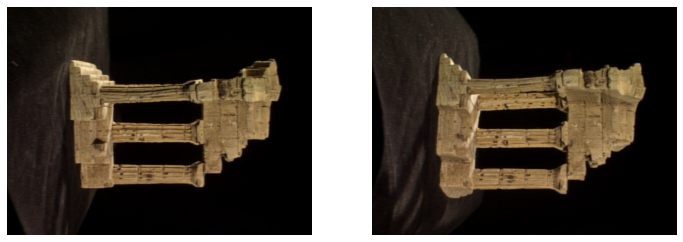

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
f = open(r'./templeSparseRing/templeSR_par.txt','r')
assert f is not None
n= int(f.readline())
#Reading information for image 1
l = f.readline().split()
im1_fn=l[0]
K1=np.array([float(i) for i in l[1:10]]).reshape(3,3)
R1=np.array([float(i) for i in l[10:19]]).reshape(3,3)
t1=np.array([float(i) for i in l[19:22]]).reshape(3,1)
#Reading information for image 2
l = f.readline().split()
im2_fn=l[0]
K2=np.array([float(i) for i in l[1:10]]).reshape(3,3)
R2=np.array([float(i) for i in l[10:19]]).reshape(3,3)
t2=np.array([float(i) for i in l[19:22]]).reshape(3,1)

#Read two images and show
img1= cv.imread(r'./templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
img2= cv.imread(r'./templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].axis("off"),ax[1].axis("off")

#2

In [20]:
#compute P1 and P2
P1 = K1@np.hstack((R1,t1))#P = K*[R\t]
P2 = K1@np.hstack((R2,t2))#P = K*[R\t]
print(P1)
print(P1)

[[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]
[[ 4.80251845e+01  1.44011271e+03 -5.71648932e+02  7.53293366e+01]
 [ 1.53577034e+03 -6.41434324e+01 -1.63127843e+02  1.85810055e+02]
 [ 4.88387837e-02 -1.81568392e-01 -9.82164799e-01  6.14604846e-01]]


#3

In [21]:
from scipy.linalg import null_space
def skew(x):
    x=x.ravel()
    return np.array([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])
C = null_space(P1)
C=C*np.sign(C[0,0])
e2=P2@C
e2x = skew(e2)
F=e2x@P2@np.linalg.pinv(P1)
F

array([[-2.87071497e-04, -3.96261289e-02,  2.94221686e+02],
       [-3.55039713e-02,  1.65329260e-04,  1.78860854e+01],
       [-2.76702814e+02,  2.12942175e+01, -9.06669374e+03]])

(-0.5, 639.5, 479.5, -0.5)

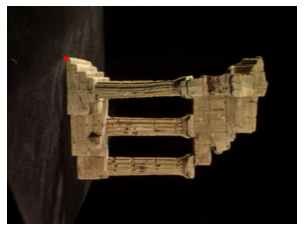

In [26]:
x=np.array([130,115,1])
cv.circle(img1,(x[0],x[1]),5,(0,0,255),-1)
fig, ax = plt.subplots()
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax.imshow(img1)
ax.axis("off")

(-0.5, 639.5, 479.5, -0.5)

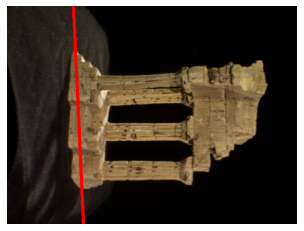

In [27]:
l2 = F@x.T
p1=np.array([0,(l2[0]+l2[2])/l2[1]]).astype(int)
p2=np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
cv.line(img2,(p1[0],p1[1]),(p2[0],p2[1]),(255,0,0),5)
fig, ax = plt.subplots()
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax.imshow(img2)
ax.axis("off")

#4

(-0.5, 639.5, 479.5, -0.5)

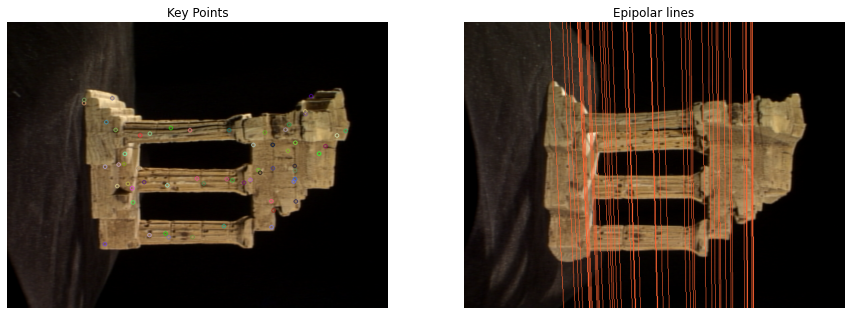

In [61]:
import cv2 as cv
import numpy as np
img1= cv.imread(r'./templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
img2= cv.imread(r'./templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
sift = cv.SIFT_create()

keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoint_1=sorted(keypoint_1, key = lambda x:x.response)
out = cv.drawKeypoints(img1,keypoint_1[:75],img1)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(out)
ax[0].axis("off")
ax[0].set_title("Key Points")
for i in range(len(keypoint_1[:75])):
    x=np.array([keypoint_1[i].pt[0],keypoint_1[i].pt[1],1])
    l2 = F@x.T
    p1=np.array([0,(l2[0]+l2[2])/l2[1]]).astype(int)
    p2=np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
    cv.line(img2,(p1[0],p1[1]),(p2[0],p2[1]),(255,100,50),1)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
ax[1].imshow(img2)
ax[1].set_title("Epipolar lines")
ax[1].axis("off")